In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
# Il faut enregistrer le doc excel dans le dossier dans lequel on a ouvert ce jupiter
# enregistrer le data frame sous une variable par exemple data
data = pd.read_excel('titanic3.xls')

In [71]:
# Présentation des différentes fonctions
# 1) les dimensions avec data.shape

In [72]:
data.shape

(1309, 14)

In [73]:
# 1309 passagers et 14 caractéristiques permettant de décrir les passagers

In [74]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [75]:
# Pour avoir un apperçu des premières lignes (assez utile pour jeter un oeil)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [76]:
# Pour éliminer des colonnes qui ne nous sont pas utiles on va utiliser la fct drop
dataBis = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [77]:
# on réutilise head() pour voir la tête de notre nouveau data frame
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [78]:
# Pour commencer réellement l'analyse on va utiliser la fonction describe -> stat de bases
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [79]:
# avec count on voit qu'il nous manque des données
# on peut enlever les lignes ou il manque des données ou mettre une valeur par défaut

In [80]:
#Pour enlever des lignes on utilise la fonction dropna
data = data.dropna(axis=0)

In [81]:
data.shape

(1046, 4)

In [82]:
# on peut voir avec shape qu'on est passé de 1309 passagers à 1046 passagers
# évidemment ça chage les statistiques
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [83]:
# on aimerait mt savoir sur les 1046 passagers lesquels étaient en 1er, 2eme ou 3eme classe -> value_counts()
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

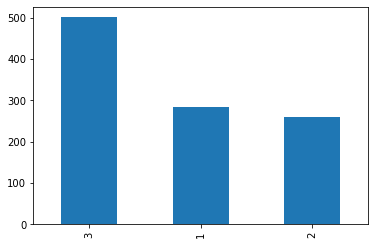

In [84]:
# créons mt le 1er graphe -> plot
data['pclass'].value_counts().plot.bar()

<AxesSubplot:>

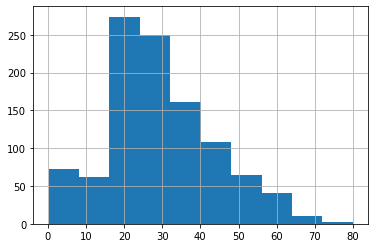

In [85]:
# on peut utiliser tout matplotlib
# voir la répartition en fonction des ages
data['age'].hist()

In [86]:
# la fonction groupby va permettre de faire notre analyse en regroupant par exemple les gens par leur sexe
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [87]:
# on peut aussi regrouper en fonction de plusieurs paramètres -> sexe et classe
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [88]:
# un data frame est composé de série (qui est juste une colonne). Et une série est une colonne numpy avec une petite colonne sur la gauche
# qui est l'index, mais pas le même que dans numpy car ici on peut le choisir et le modifier 
# exemple :

In [89]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [90]:
# on a une colonne à droite avec les ages et à gauche on a la colonne d'index mais différent d'index numpy

In [91]:
data = data.set_index('sex')
data['age']

sex
female    29.0000
male       0.9167
female     2.0000
male      30.0000
female    25.0000
           ...   
male      45.5000
female    14.5000
male      26.5000
male      27.0000
male      29.0000
Name: age, Length: 1046, dtype: float64

In [92]:
# on peut dès lors partager des séries ensemble lorsqu'elle partage un même index

In [93]:
# Un data frame c'est un peu comme un dictionnaire qui contient des séries
# dictionnaire -> clé et valeurs
#dataframe -> clé et séries

In [94]:
data['age'][0:10]
# ici on à gauche une série et à droite de l'indexing sur le tableau numpy de cette série
# on obtient les 10 premières valeurs de notre série age

sex
female    29.0000
male       0.9167
female     2.0000
male      30.0000
female    25.0000
male      48.0000
female    63.0000
male      39.0000
female    53.0000
male      71.0000
Name: age, dtype: float64

In [95]:
# on peut faire aussi du booléen indexing et générer un masque
data['age'] < 18

sex
female    False
male       True
female     True
male      False
female    False
          ...  
male      False
female     True
male      False
male      False
male      False
Name: age, Length: 1046, dtype: bool

In [96]:
# ce masque on peut le réinjecter dans le data frame data ce qui va nous donner 
# un data frame ou on a sélectionner uniquement les passagers mineurs
data[data['age'] < 18]

,pclass,survived,age
sex,,,
male,1,1,0.9167
female,1,0,2.0000
male,1,0,17.0000
male,1,1,11.0000
female,1,1,14.0000
...,...,...,...
female,3,0,10.0000
male,3,0,16.0000
female,3,0,14.0000


In [97]:
# avec ce data frame de passagers mineurs on peut utiliser les fonctions tels que groupby ou value_counts()
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [98]:
data[data['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [99]:
# avec la fonction iloc (index localisation) on peut faire de l'indexing exactement comme dans numpy
# data[0, 0] ne fonctionnera pas car on n'est pas dans numpy mais les dev pandas ont compris l'utilité d'ou -> iloc
data.iloc[0, 0]

1

In [100]:
# avec ça on peut faire de l'indexing
# ou du slicing
data.iloc[0:2, 0:2]

,pclass,survived
sex,,
female,1,1
male,1,1


In [103]:
# la fonction loc permet de faire la même chose mais sur les colonnes
dataBis.loc[0:2, 'age']

0    29.0000
1     0.9167
2     2.0000
Name: age, dtype: float64

In [105]:
# si plusieur colonnes -> on crée une liste de colonne entre crochet
dataBis.loc[0:2, ['age', 'sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
